In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#loading dataset
url='/home/umar/ML-AI/datasets/sonar-all-data.csv'
dataset=pd.read_csv(url,header=None)
print("Shape of dataset is:",dataset.shape)

Shape of dataset is: (208, 61)


In [4]:
#converting to 3 decimal places
pd.set_option('precision',3)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R


In [5]:
#class distribution - rocks=97, metals=111 , feature sets=60
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

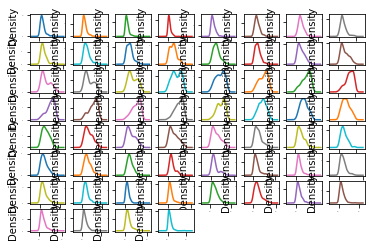

In [6]:
#Unimodal data visualisation
# density distribution graph
dataset.plot(kind='density',subplots=True,layout=(8,8),sharex=False,legend=False,fontsize=1)
pyplot.show()

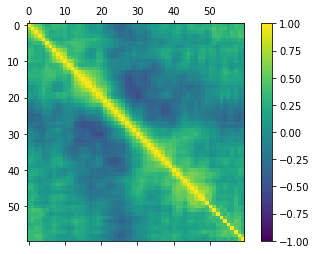

In [7]:
#multimodal data visualisation
#corelation matrix 
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [8]:
#splitting dataset into testing and training
array=dataset.values
X=array[:,0:60] #all the rows, only 0 to 59th colomn for features
Y=array[:,60] # all the rows, only the 60th column of target
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.20,random_state=7)

In [9]:
#spot-check
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [10]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR 0.769485 (0.100510)
LDA 0.746324 (0.117854)
KNN 0.808088 (0.067507)
CART 0.711029 (0.102351)
NB 0.648897 (0.141868)
SVM 0.776471 (0.090411)


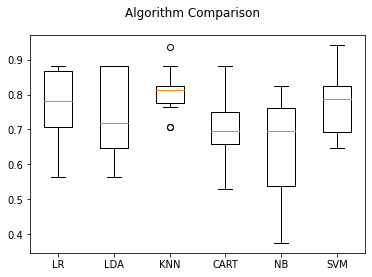

In [11]:
#algorithm comparison
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [12]:
#standardising the data and then training-
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA',Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))

results = []
names = []
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)


LR 0.769485 (0.100510)
LDA 0.746324 (0.117854)
KNN 0.808088 (0.067507)
CART 0.717647 (0.111825)
NB 0.648897 (0.141868)
SVM 0.776471 (0.090411)


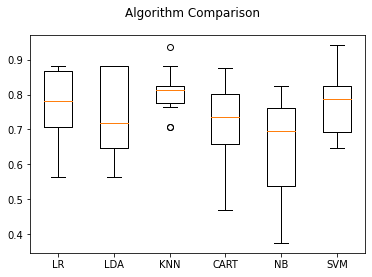

In [13]:
#algorithm comparison after using standardised data
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [14]:
#finalising the model using KNN
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=KNeighborsClassifier()
model.fit(rescaledX,Y_train)

#estimating accuracy
rescaledvalidationX=scaler.fit_transform(X_validation)
predictions=model.predict(rescaledvalidationX)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8333333333333334
[[23  4]
 [ 3 12]]
              precision    recall  f1-score   support

           M       0.88      0.85      0.87        27
           R       0.75      0.80      0.77        15

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.82        42
weighted avg       0.84      0.83      0.83        42



In [16]:
#Tuning KNN
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
neighbors=[1,3,5,7,9,11,13,15,17,19,21]
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=KFold(n_splits=10)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: 0.850000 using {'n_neighbors': 1}
